<a href="https://colab.research.google.com/github/BrainConnection/Schroedinger-Practice/blob/main/chat_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install numpy
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


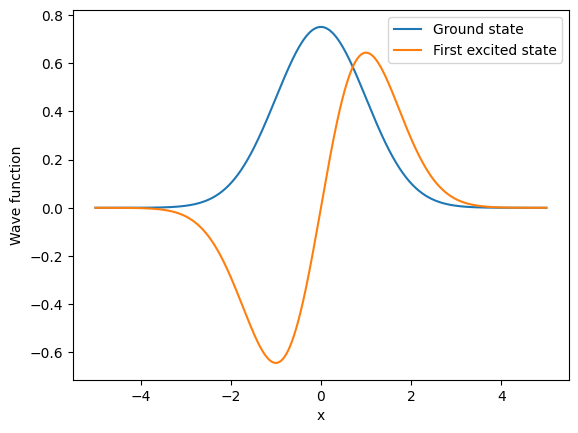

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function for a harmonic oscillator
def V(x):
    return 0.5 * x**2

# Define the constants
hbar = 1
m = 1
omega = 1
N = 1000 # Number of points in the grid
L = 10 # Range of the x-axis

# Define the grid
x = np.linspace(-L/2, L/2, N)

# Define the step size
dx = x[1] - x[0]

# Define the kinetic energy matrix
T = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            T[i, j] = -2
        elif abs(i-j) == 1:
            T[i, j] = 1
T = -0.5 * (hbar**2) / (m*dx**2) * T

# Define the potential energy matrix
V_mat = np.diag(V(x))

# Solve the Schrödinger equation
E, psi = np.linalg.eigh(T + V_mat)

# Normalize the wave function
norm = np.sqrt(dx*np.sum(psi**2, axis=0))
psi /= norm

# Plot the wave function
plt.plot(x, psi[:, 0], label='Ground state')
plt.plot(x, psi[:, 1], label='First excited state')
plt.xlabel('x')
plt.ylabel('Wave function')
plt.legend()
plt.show()

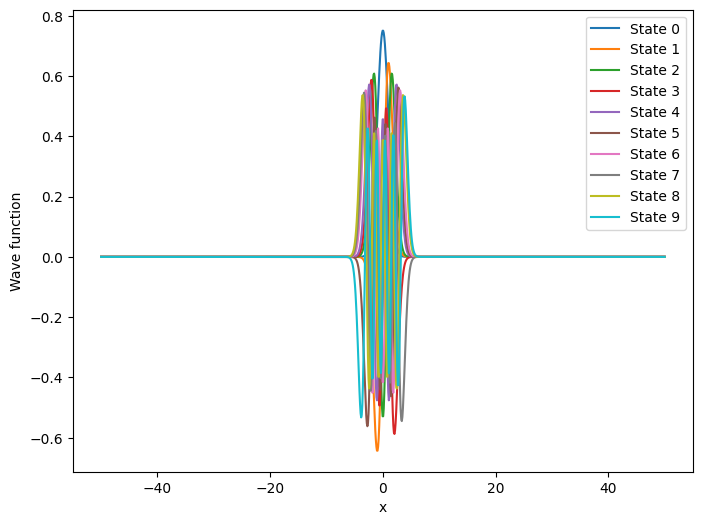

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function for a harmonic oscillator
def V(x):
    return 0.5 * x**2

# Define the constants
hbar = 1
m = 1
omega = 1
N = 1000 # Number of points in the grid
L = 100 # Range of the x-axis

# Define the grid
x = np.linspace(-L/2, L/2, N)

# Define the step size
dx = x[1] - x[0]

# Define the kinetic energy matrix
T = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            T[i, j] = -2
        elif abs(i-j) == 1:
            T[i, j] = 1
T = -0.5 * (hbar**2) / (m*dx**2) * T

# Define the potential energy matrix
V_mat = np.diag(V(x))

# Solve the Schrödinger equation
E, psi = np.linalg.eigh(T + V_mat)

# Normalize the wave functions
norm = np.sqrt(dx*np.sum(psi**2, axis=0))
psi /= norm

# Plot the wave functions
n_states = 10 # Number of states to plot
plt.figure(figsize=(8, 6))
for i in range(n_states):
    plt.plot(x, psi[:, i], label=f'State {i}')
plt.xlabel('x')
plt.ylabel('Wave function')
plt.legend()
plt.show()


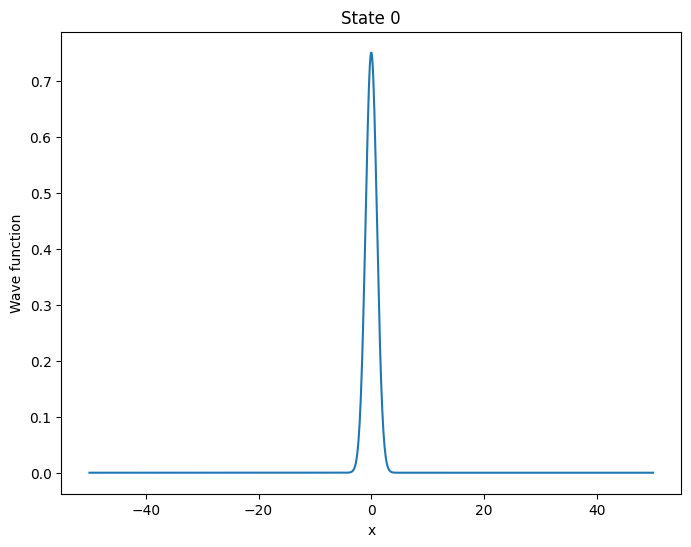

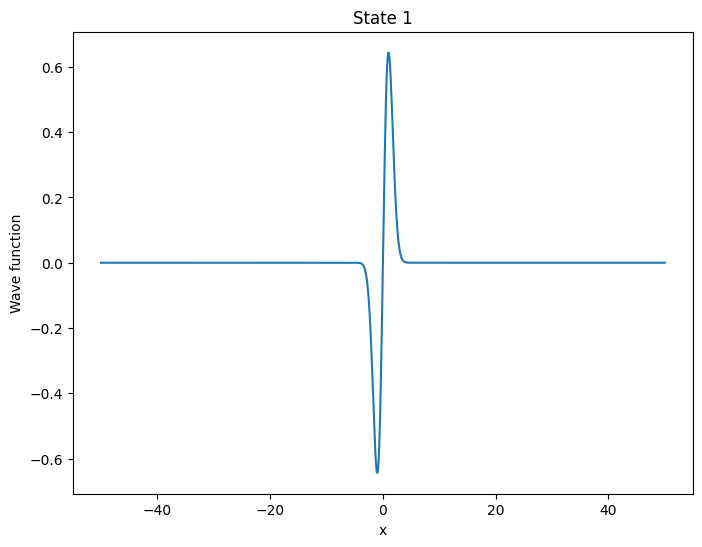

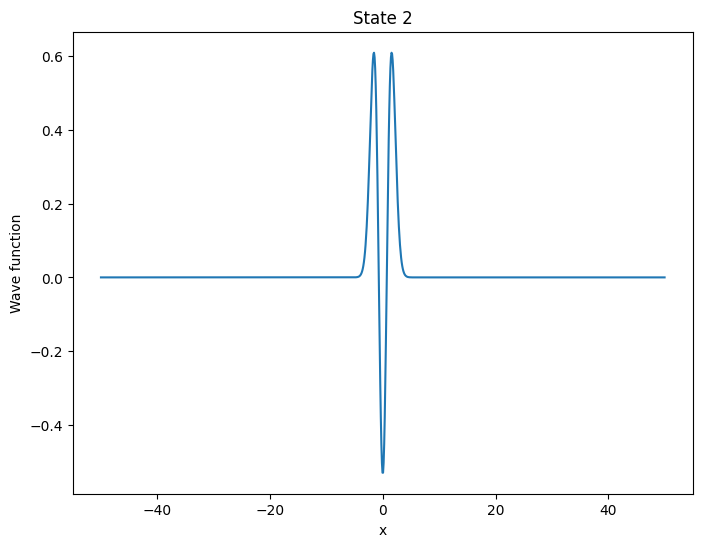

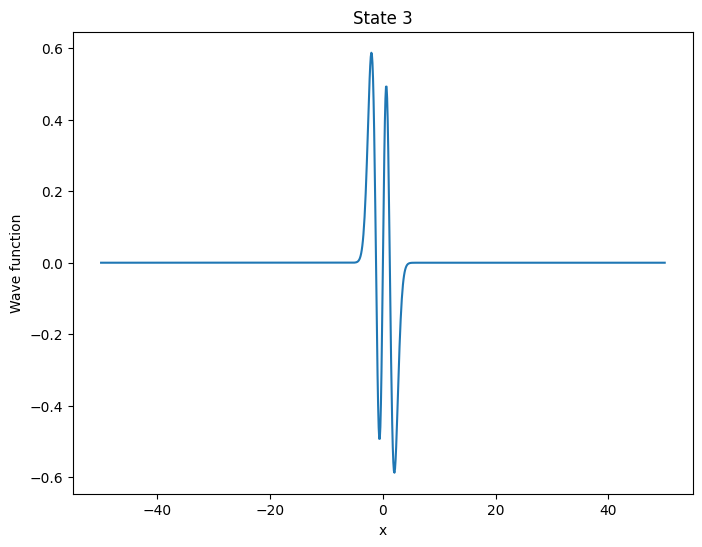

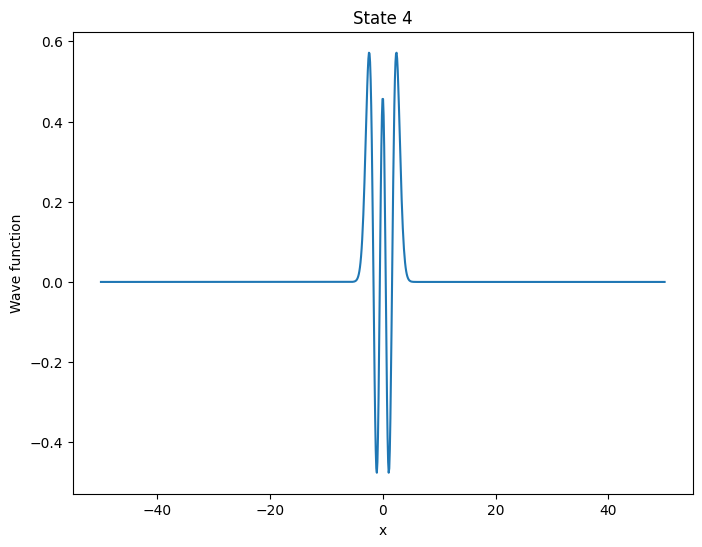

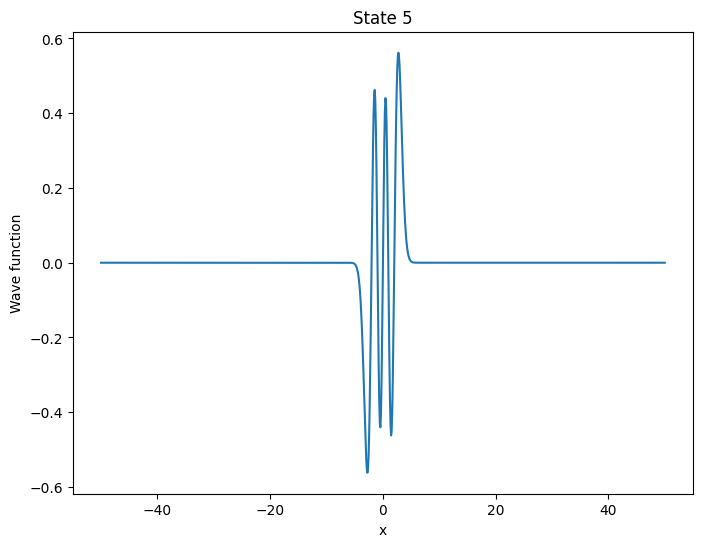

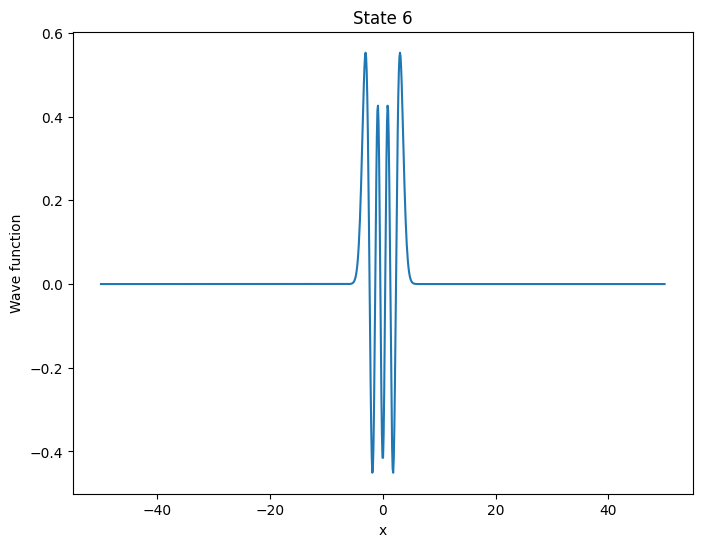

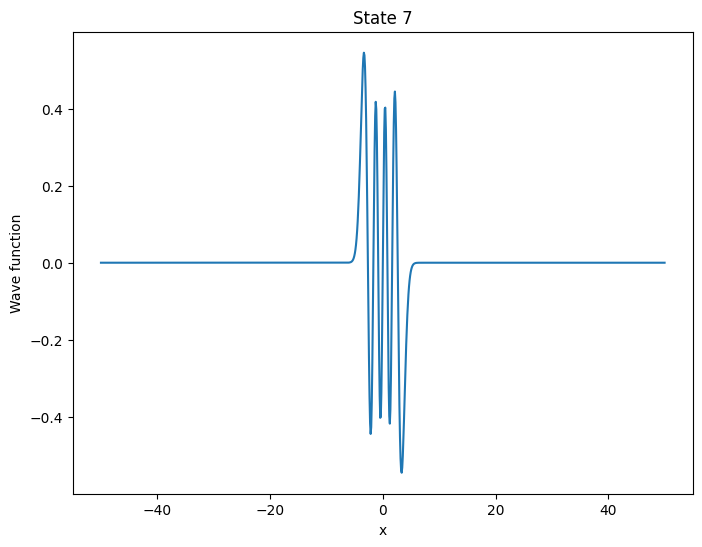

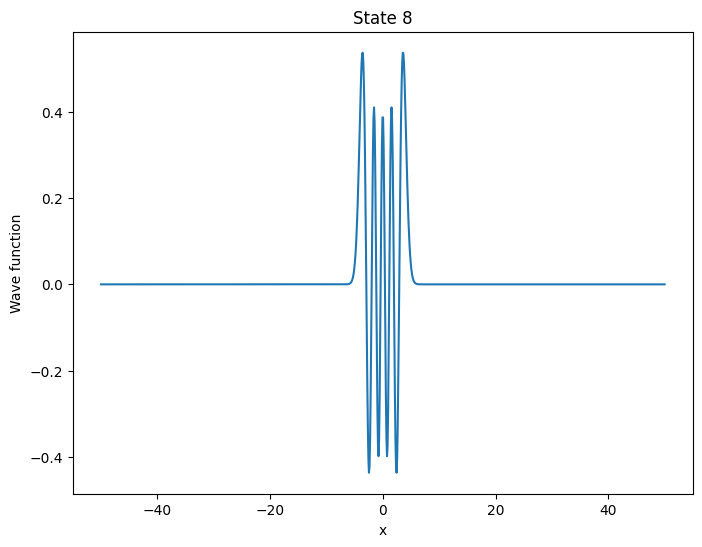

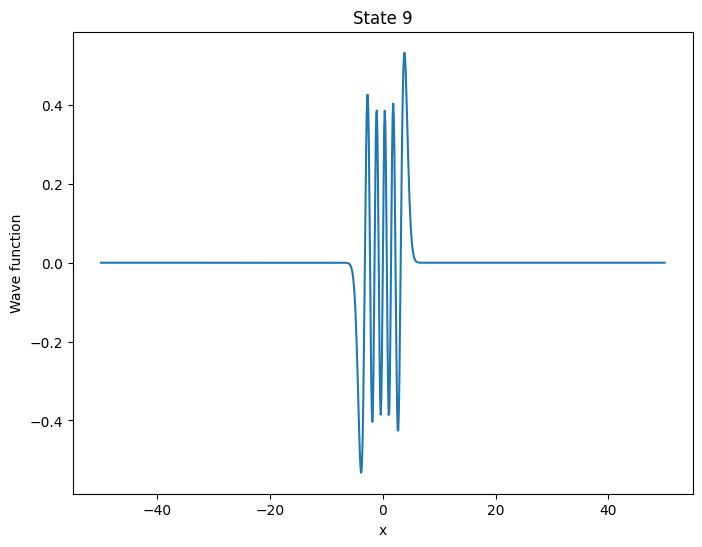

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function for a harmonic oscillator
def V(x):
    return 0.5 * x**2

# Define the constants
hbar = 1
m = 1
omega = 1
N = 1000 # Number of points in the grid
L = 100 # Range of the x-axis

# Define the grid
x = np.linspace(-L/2, L/2, N)

# Define the step size
dx = x[1] - x[0]

# Define the kinetic energy matrix
T = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            T[i, j] = -2
        elif abs(i-j) == 1:
            T[i, j] = 1
T = -0.5 * (hbar**2) / (m*dx**2) * T

# Define the potential energy matrix
V_mat = np.diag(V(x))

# Solve the Schrödinger equation
E, psi = np.linalg.eigh(T + V_mat)

# Normalize the wave functions
norm = np.sqrt(dx*np.sum(psi**2, axis=0))
psi /= norm

# Plot the wave functions
n_states = 10 # Number of states to plot
for i in range(n_states):
    plt.figure(figsize=(8, 6))
    plt.plot(x, psi[:, i])
    plt.xlabel('x')
    plt.ylabel('Wave function')
    plt.title(f'State {i}')
    plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
hbar = 1.0545718e-34  # Planck's constant / 2π
m = 1.0  # Mass of the particle
omega = 1.0  # Angular frequency of the oscillator potential
L = 10.0  # Length of the box in each dimension
N = 200  # Number of grid points in each dimension
dx = L / (N-1)  # Grid spacing
x = np.linspace(-L/2, L/2, N)  # Position grid
y = np.linspace(-L/2, L/2, N)
X, Y = np.meshgrid(x, y)
V = 0.5 * m * omega**2 * (X**2 + Y**2)  # Potential energy grid
dt = 1e-17  # Time step
t_max = 1e-15  # Maximum time for simulation
n_states = 5  # Number of energy eigenstates to compute

# Define the wave function
psi = np.zeros((N,N), dtype=np.complex128)
psi_old = np.zeros((N,N), dtype=np.complex128)

# Set initial conditions for ground state
psi[N//2,N//2] = 1.0

# Define the kinetic energy operator
def kinetic_energy(psi):
    psi_x = (np.roll(psi, -1, axis=0) - np.roll(psi, 1, axis=0)) / (2*dx)
    psi_y = (np.roll(psi, -1, axis=1) - np.roll(psi, 1, axis=1)) / (2*dx)
    psi_xx = (np.roll(psi, -1, axis=0) + np.roll(psi, 1, axis=0) - 2*psi) / dx**2
    psi_yy = (np.roll(psi, -1, axis=1) + np.roll(psi, 1, axis=1) - 2*psi) / dx**2
    ke = -0.5 * hbar**2 / m * (psi_xx + psi_yy) - 0.5 * m * omega**2 * (X**2 + Y**2) * psi
    return ke

# Define the potential energy operator
def potential_energy(psi):
    return V * psi

# Define the Hamiltonian operator
def hamiltonian(psi):
    ke = kinetic_energy(psi)
    pe = potential_energy(psi)
    ham = ke + pe
    return ham

# Define the Numerov method for time evolution
def numerov_step(psi, psi_old, ham, dt):
    psi_new = 2 * psi - psi_old + dt**2 / hbar * ham * psi
    return psi_new, psi

# Compute the energy eigenstates
energies = []
wavefuncs = []
for i in range(n_states):
    # Normalize the wave function
    psi /= np.sqrt(np.sum(np.abs(psi)**2) * dx**2)
    psi_old = np.copy(psi)

    # Compute the energy eigenvalue using the shooting method
    E_min = 0.5 * hbar * omega
    E_max = 20 * hbar * omega
    while True:
        E_mid = (E_min + E_max) / 2
        psi_new


NameError: ignored

ValueError: ignored

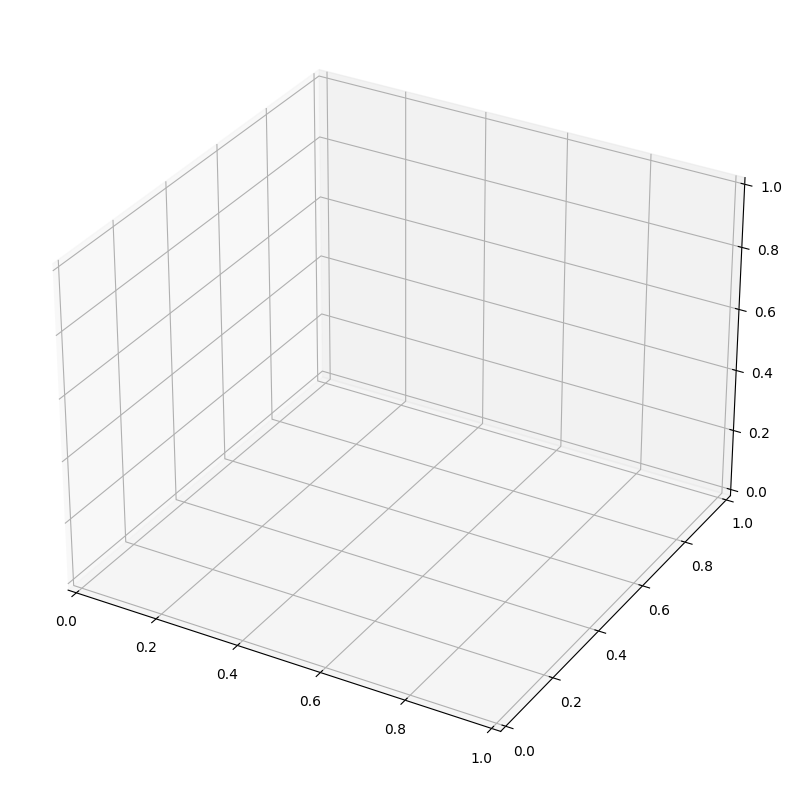

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
hbar = 1.0   # Reduced Planck's constant
m = 1.0      # Mass of particle
w = 1.0      # Angular frequency of oscillator

# Define potential energy function
def V(x, y):
    return 0.5*m*w**2*(x**2 + y**2)

# Define the number of grid points and the range of x and y
N = 100
x_min, x_max = -5.0, 5.0
y_min, y_max = -5.0, 5.0
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)

# Create a 2D grid
X, Y = np.meshgrid(x, y)

# Define the spacing of x and y
dx = x[1] - x[0]
dy = y[1] - y[0]

# Define the wave function
def psi(n, m):
    A = (m*w)/(np.pi*hbar)
    x_term = np.exp(-0.5*m*w/hbar * x**2)
    y_term = np.exp(-0.5*m*w/hbar * y**2)
    Hx = np.polynomial.hermite.Hermite(n)(np.sqrt(m*w/hbar) * x)
    Hy = np.polynomial.hermite.Hermite(m)(np.sqrt(m*w/hbar) * y)
    return A * x_term * y_term * Hx * Hy

# Define the energy level
n_states = 5

# Calculate the wave function for each energy level
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for n in range(n_states):
    for m in range(n_states):
        energy = hbar*w*(n+m+1)
        wave_func = psi(n, m)
        prob_density = wave_func*np.conj(wave_func)
        ax.plot_surface(X, Y, prob_density, cmap='plasma')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Probability density')
        ax.set_title('2D Harmonic Oscillator')
        plt.show()


ValueError: ignored

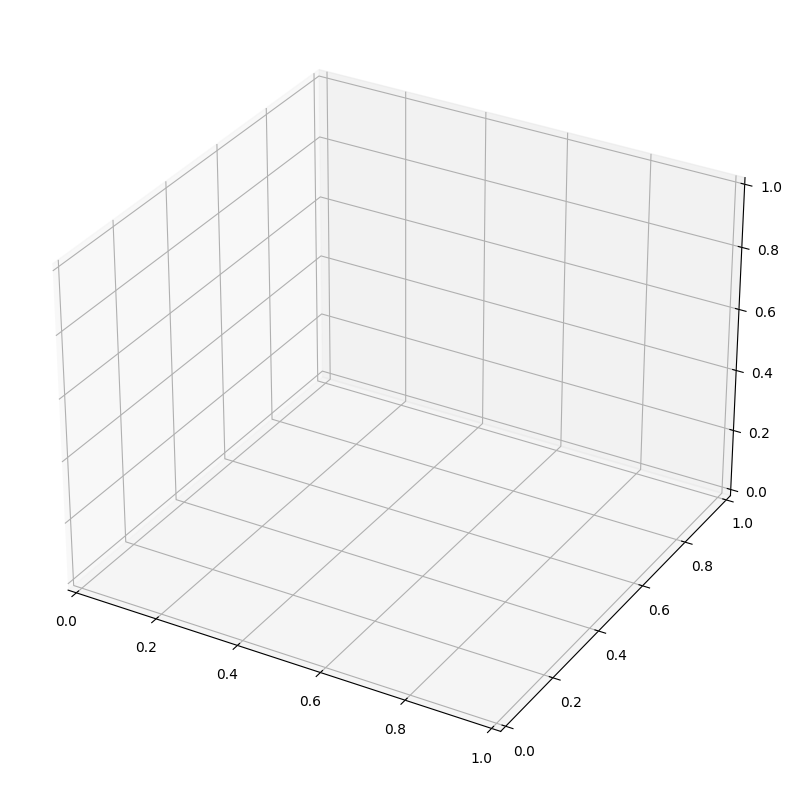

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
hbar = 1.0   # Reduced Planck's constant
m = 1.0      # Mass of particle
w = 1.0      # Angular frequency of oscillator

# Define potential energy function
def V(x, y):
    return 0.5*m*w**2*(x**2 + y**2)

# Define the number of grid points and the range of x and y
N = 100
x_min, x_max = -5.0, 5.0
y_min, y_max = -5.0, 5.0
x = np.linspace(x_min, x_max, N)
y = np.linspace(y_min, y_max, N)

# Create a 2D grid
X, Y = np.meshgrid(x, y)

# Define the spacing of x and y
dx = x[1] - x[0]
dy = y[1] - y[0]

# Define the wave function
def psi(n, m):
    A = np.sqrt(2.0/(w*np.pi*hbar))
    x_term = np.exp(-0.5*m*w/hbar * x**2)
    y_term = np.exp(-0.5*m*w/hbar * y**2)
    Hx = np.polynomial.hermite.Hermite(n)(np.sqrt(m*w/hbar) * x)
    Hy = np.polynomial.hermite.Hermite(m)(np.sqrt(m*w/hbar) * y)
    return A * x_term * y_term * Hx * Hy

# Define the energy level
n_states = 5

# Calculate the wave function for each energy level
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
for n in range(n_states):
    for m in range(n_states):
        energy = hbar*w*(n+m+1)
        wave_func = psi(n, m)
        prob_density = wave_func*np.conj(wave_func)
        ax.plot_surface(X, Y, prob_density, cmap='plasma')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Probability density')
        ax.set_title('2D Harmonic Oscillator')
plt.show()


ZeroDivisionError: ignored

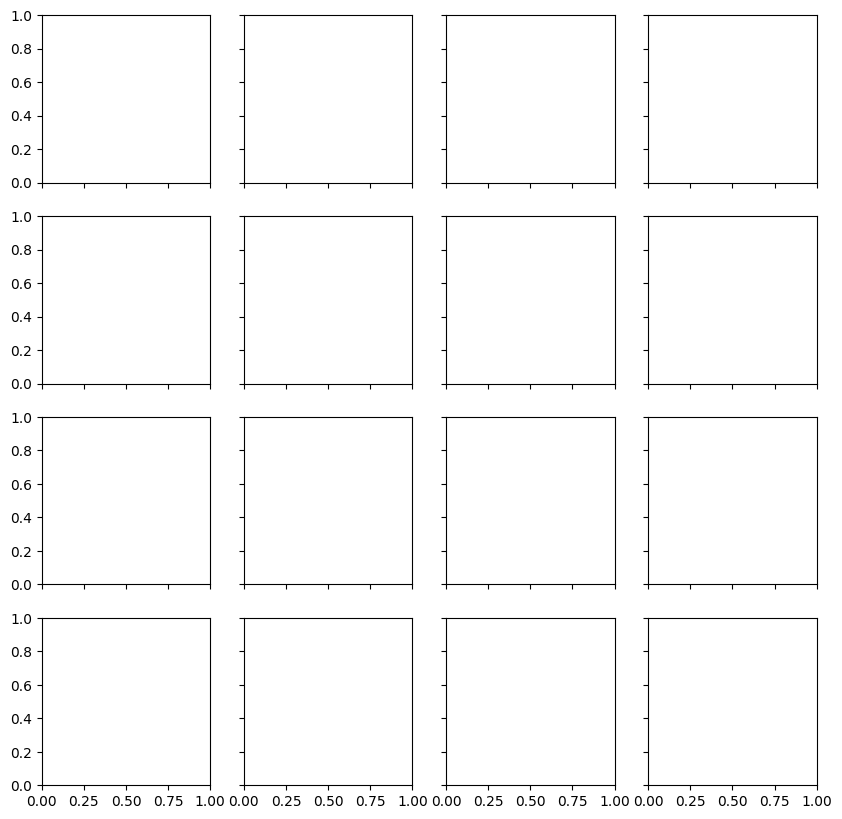

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# define constants
hbar = 1.0   # Planck's constant/2pi
m = 1.0      # particle mass
w = 1.0      # oscillator frequency
x0 = 0.0     # initial position
y0 = 0.0     # initial position

# define the range of x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# define the wavefunction
def psi(n, m, x, y):
    """
    Returns the wavefunction for a 2D harmonic oscillator in the (n,m) state.
    """
    alpha = np.sqrt(hbar / (m*w))
    Hn = np.polynomial.hermite.hermval(alpha*x, n)
    Hm = np.polynomial.hermite.hermval(alpha*y, m)
    return (alpha/np.pi)**0.5 * np.exp(-alpha**2 * (x**2 + y**2)/2) * Hn * Hm

# calculate the probability density function
def prob_density(n, m, x, y):
    """
    Returns the probability density function for a 2D harmonic oscillator in the (n,m) state.
    """
    psi_nm = psi(n, m, x, y)
    return np.abs(psi_nm)**2

# plot the probability density function
n_max = 3
m_max = 3
fig, axs = plt.subplots(n_max+1, m_max+1, figsize=(10, 10), sharex=True, sharey=True)
norm = Normalize(vmin=0, vmax=0.1)

for n in range(n_max+1):
    for m in range(m_max+1):
        prob = prob_density(n, m, X, Y)
        ax = axs[n][m]
        ax.set_title("n={}, m={}".format(n, m))
        ax.pcolormesh(X, Y, prob, cmap='plasma', norm=norm)
        
plt.show()


ZeroDivisionError: ignored

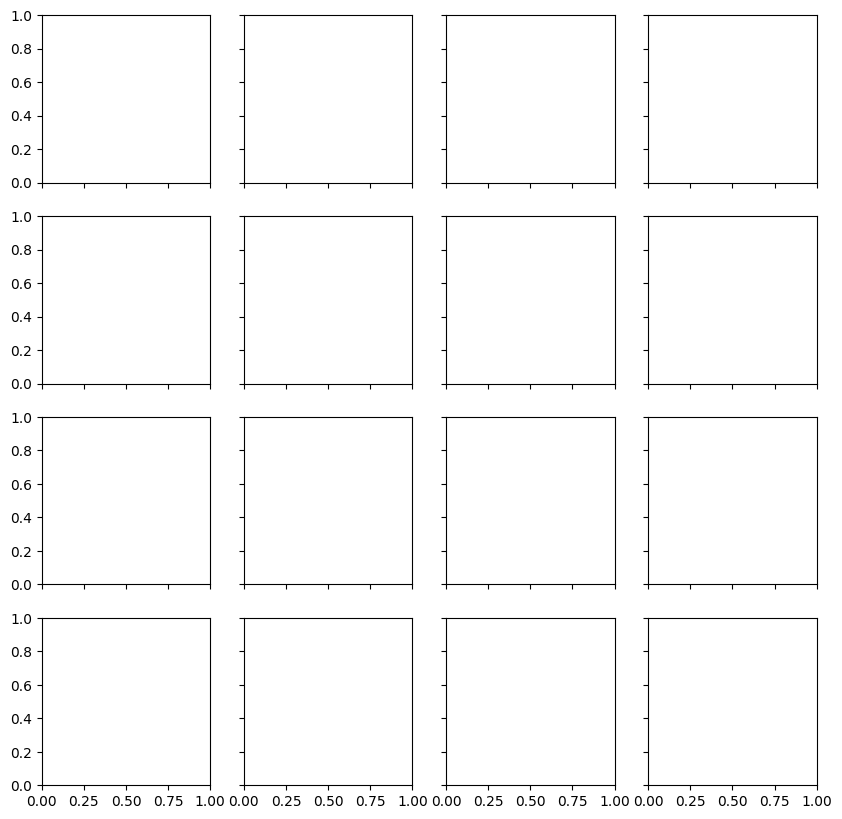

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# define constants
hbar = 1.0   # Planck's constant/2pi
m = 1.0      # particle mass
w = 1.0      # oscillator frequency
x0 = 0.0     # initial position
y0 = 0.0     # initial position

# define the range of x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# define the wavefunction
def psi(n, m, x, y):
    """
    Returns the wavefunction for a 2D harmonic oscillator in the (n,m) state.
    """
    alpha = np.sqrt(hbar / (m*w))
    Hn = np.polynomial.hermite.hermval(alpha*x, n)
    Hm = np.polynomial.hermite.hermval(alpha*y, m)
    return (alpha/np.pi)**0.5 * np.exp(-alpha**2 * (x**2 + y**2)/2) * Hn * Hm

# calculate the probability density function
def prob_density(n, m, x, y):
    """
    Returns the probability density function for a 2D harmonic oscillator in the (n,m) state.
    """
    psi_nm = psi(n, m, x, y)
    return np.abs(psi_nm)**2

# plot the probability density function
n_max = 3
m_max = 3
fig, axs = plt.subplots(n_max+1, m_max+1, figsize=(10, 10), sharex=True, sharey=True)
norm = Normalize(vmin=0, vmax=0.1)

for n in range(n_max+1):
    for m in range(m_max+1):
        prob = prob_density(n, m, X, Y)
        ax = axs[n][m]
        ax.set_title("n={}, m={}".format(n, m))
        ax.pcolormesh(X, Y, prob, cmap='plasma', norm=norm)
        
plt.show()


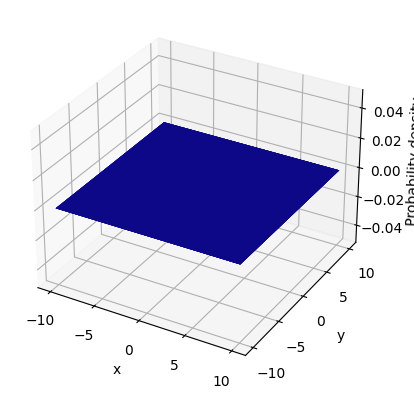

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
hbar = 1.0   # Reduced Planck's constant
m_particle = 1.0   # Particle mass
w = 1.0   # Angular frequency

# Grid of x, y values
x = np.linspace(-10, 10, 201)
y = np.linspace(-10, 10, 201)
X, Y = np.meshgrid(x, y)

# Compute the energy levels
n_states = 5   # Number of energy levels to compute
energies = hbar*w*(np.arange(n_states) + 1.5)

# Compute the wave functions
alpha = np.sqrt(hbar / (m_particle*w))
psi_n = []
for n in range(n_states):
    psi_n.append(np.sqrt(np.power(alpha, 2)*np.math.factorial(n)/np.math.factorial(2*n))*np.power((m_particle*w)/(np.pi*hbar), 0.25)*np.exp(-np.power(alpha, 2)*X**2/2)*np.exp(-np.power(alpha, 2)*Y**2/2)*np.polynomial.hermite.hermval(np.sqrt(np.power(alpha, 2))*X, np.zeros(n+1)))
    
# Compute the probability density
prob_density = np.abs(psi_n)**2

# Plot the probability density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(n_states):
    ax.plot_surface(X, Y, prob_density[i], cmap='plasma')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Probability density')
plt.show()


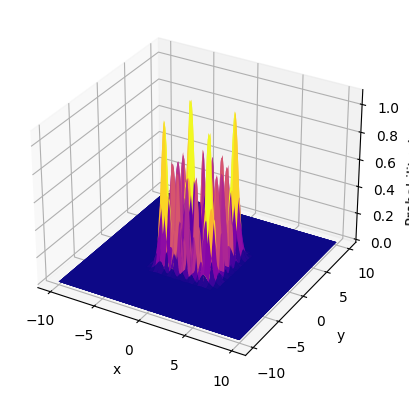

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
hbar = 1.0   # Reduced Planck's constant
m_particle = 1.0   # Particle mass
w = 1.0   # Angular frequency

# Grid of x, y values
x = np.linspace(-10, 10, 201)
y = np.linspace(-10, 10, 201)
X, Y = np.meshgrid(x, y)

# Compute the energy levels
n_states = 5   # Number of energy levels to compute
energies = hbar*w*(np.arange(n_states) + 1.5)

# Compute the wave functions
alpha = np.sqrt(m_particle*w/hbar)
psi_n = []
for n in range(n_states):
    herm_coeffs = np.zeros(n+1)
    herm_coeffs[n] = 1.0
    psi_n.append((alpha/np.pi)**0.25*np.sqrt(np.power(2.0, n)*np.math.factorial(n))*np.exp(-0.5*alpha*alpha*(X*X + Y*Y))*np.polynomial.hermite.hermval(alpha*X, herm_coeffs)*np.polynomial.hermite.hermval(alpha*Y, herm_coeffs))
    
# Compute the probability density
prob_density = np.abs(psi_n)**2

# Plot the probability density
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(n_states):
    ax.plot_surface(X, Y, prob_density[i], cmap='plasma')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Probability density')
plt.show()


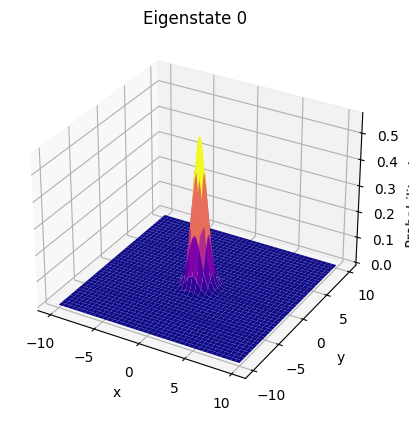

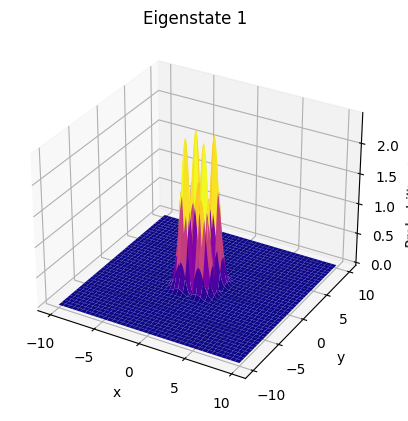

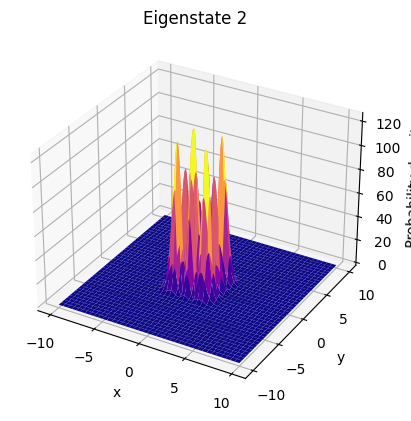

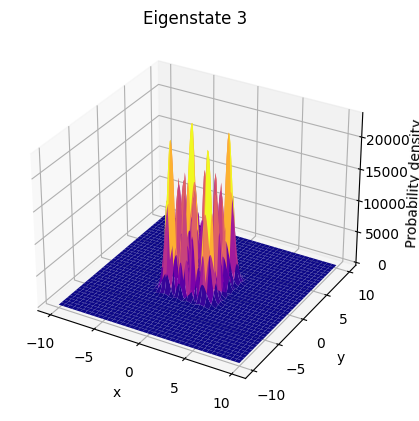

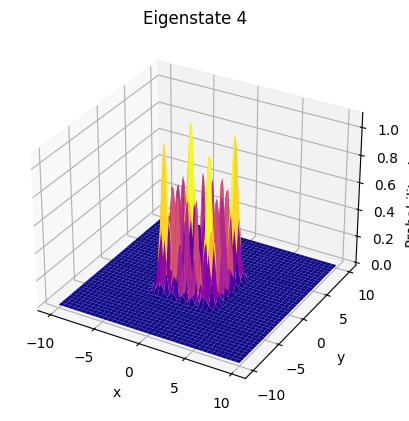

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
hbar = 1.0   # Reduced Planck's constant
m_particle = 1.0   # Particle mass
w = 1.0   # Angular frequency

# Grid of x, y values
x = np.linspace(-10, 10, 201)
y = np.linspace(-10, 10, 201)
X, Y = np.meshgrid(x, y)

# Compute the energy levels
n_states = 5   # Number of energy levels to compute
energies = hbar*w*(np.arange(n_states) + 1.5)

# Compute the wave functions
alpha = np.sqrt(m_particle*w/hbar)
psi_n = []
for n in range(n_states):
    herm_coeffs = np.zeros(n+1)
    herm_coeffs[n] = 1.0
    psi_n.append((alpha/np.pi)**0.25*np.sqrt(np.power(2.0, n)*np.math.factorial(n))*np.exp(-0.5*alpha*alpha*(X*X + Y*Y))*np.polynomial.hermite.hermval(alpha*X, herm_coeffs)*np.polynomial.hermite.hermval(alpha*Y, herm_coeffs))
    
# Compute the probability density
prob_density = np.abs(psi_n)**2

# Plot the probability density of each eigenstate
for i in range(n_states):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, prob_density[i], cmap='plasma')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Probability density')
    ax.set_title('Eigenstate %d' % i)
    plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants and parameters
hbar = 1
m = 1
L = 5   # length of the square well
n_states = 3  # number of energy states to calculate
dx = dy = 0.05  # step size in x and y direction
x = y = np.arange(-L/2, L/2+dx, dx)  # create x and y grid
X, Y = np.meshgrid(x, y)  # create mesh grid

# Potential energy function
def V(x,y):
    if abs(x) < L/2 and abs(y) < L/2:
        return 0
    else:
        return np.inf

# Kinetic energy operator
def T(psi, h):
    return - (h**2 / (2*m)) * (np.roll(psi, -1, axis=0) + np.roll(psi, 1, axis=0)
                               + np.roll(psi, -1, axis=1) + np.roll(psi, 1, axis=1)
                               - 4*psi) / (dx**2)

# Total energy function
def E(n):
    return (n**2 * np.pi**2 * hbar**2) / (2*m*L**2)

# Initialize wave function and energy array
psi = np.zeros_like(X)
E_array = np.zeros(n_states)

# Calculation of energy states and wave functions
for n in range(n_states):
    psi_old = psi.copy()
    psi = np.random.rand(*X.shape) * np.exp(1j * np.random.rand(*X.shape) * 2 * np.pi)
    psi[0,:] = psi[-1,:] = psi[:,0] = psi[:,-1] = 0  # set boundary conditions
    E_old = 0
    E_new = E(n+1)
    while abs(E_old - E_new) > 1e-6:
        psi_new = psi + T(psi, hbar) * dx**2 + V(X,Y) * psi * dx**2 / hbar
        psi_new[0,:] = psi_new[-1,:] = psi_new[:,0] = psi_new[:,-1] = 0  # set boundary conditions
        psi = psi_new / np.sqrt(np.sum(np.abs(psi_new)**2) * dx**2)  # normalization
        E_old = E_new
        E_new = np.sum(np.conj(psi) * (T(psi, hbar) + V(X,Y) * psi)) * dx**2 / np.sum(np.abs(psi)**2 * dx**2)
    E_array[n] = E_new

    # Plotting the probability density
    prob_density = np.abs(psi)**2
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, prob_density, cmap='plasma')
    ax.set_title(f"Probability density of {n+1}th energy state")
    plt.show()


ValueError: ignored

ValueError: ignored

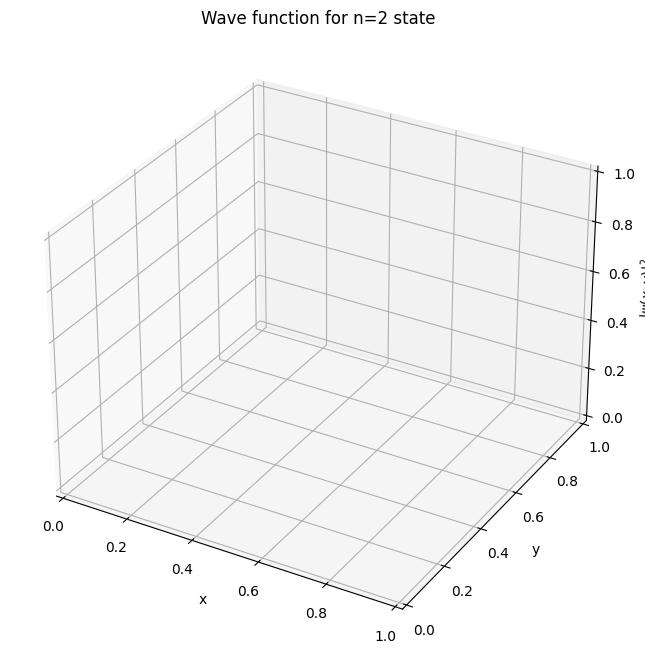

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
hbar = 1.0545718e-34  # Reduced Planck constant
m = 9.10938356e-31    # Mass of an electron
L = 1e-8              # Width of the well (in meters)
N = 100               # Number of points in the x and y directions
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)
n = 2   # Quantum numbers

# Eigenfunctions
psi_nx = np.sqrt(2/L) * np.sin(n * np.pi * X / L)
psi_ny = np.sqrt(2/L) * np.sin(n * np.pi * Y / L)
psi_n = np.outer(psi_nx, psi_ny)

# Probability density
prob_density = psi_n**2

# Plotting the wave function
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Wave function for n={n} state")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel(r'$|\psi(x,y)|^2$')
ax.plot_surface(X, Y, prob_density, cmap='plasma')
plt.show()


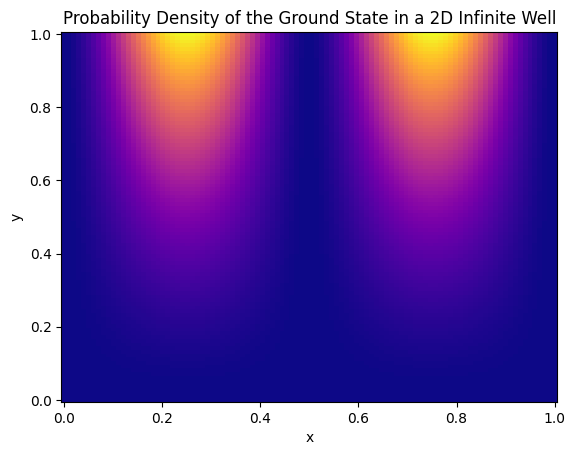

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
L = 1
n = 2
m = 9.10938356e-31
hbar = 1.0545718e-34

# Define the potential function
def V(x, y):
    if x <= 0 or x >= L or y <= 0 or y >= L:
        return 1e10
    else:
        return 0

# Define the wave function
def psi(n, m, L, x, y):
    alpha = np.sqrt(2/L)
    psi_x = np.sqrt(2)*np.sin(n*np.pi*x/L)
    psi_y = np.sqrt(2)*np.sin(m*np.pi*y/L)
    return alpha*psi_x*psi_y

# Create a meshgrid
x = np.linspace(0, L, 100)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)

# Calculate the wave function on the meshgrid
psi_2d = np.abs(psi(n, m, L, X, Y))**2

# Create a 2D plot of the wave function
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Probability Density of the Ground State in a 2D Infinite Well')
ax.pcolormesh(X, Y, psi_2d, cmap='plasma')
plt.show()


ValueError: ignored

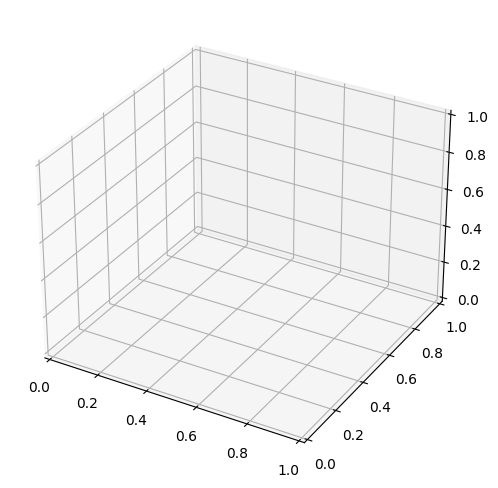

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the dimensions and potential of the well
Lx = 1
Ly = 1
V0 = 10000

# Define the mass of the particle
m_particle = 1

# Define the quantum numbers for the eigenstates
n_x = [1, 1, 2, 2, 3, 1, 3, 2, 3]
n_y = [1, 2, 1, 2, 1, 3, 2, 3, 3]

# Define the grid
Nx = 100
Ny = 100
x = np.linspace(0, Lx, Nx)
y = np.linspace(0, Ly, Ny)
X, Y = np.meshgrid(x, y)

# Calculate the wave function for each eigenstate
for i in range(len(n_x)):
    psi_x = np.sqrt(2/Lx)*np.sin(n_x[i]*np.pi*X/Lx)
    psi_y = np.sqrt(2/Ly)*np.sin(n_y[i]*np.pi*Y/Ly)
    psi = np.outer(psi_x, psi_y)
    prob_density = psi**2

    # Plot the wave function and probability density
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, psi, cmap='plasma')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Wave Function')
    ax.set_title(f"Wave Function for n_x = {n_x[i]}, n_y = {n_y[i]}")
    plt.show()

    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, prob_density, cmap='plasma')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('Probability Density')
    ax.set_title(f"Probability Density for n_x = {n_x[i]}, n_y = {n_y[i]}")
    plt.show()


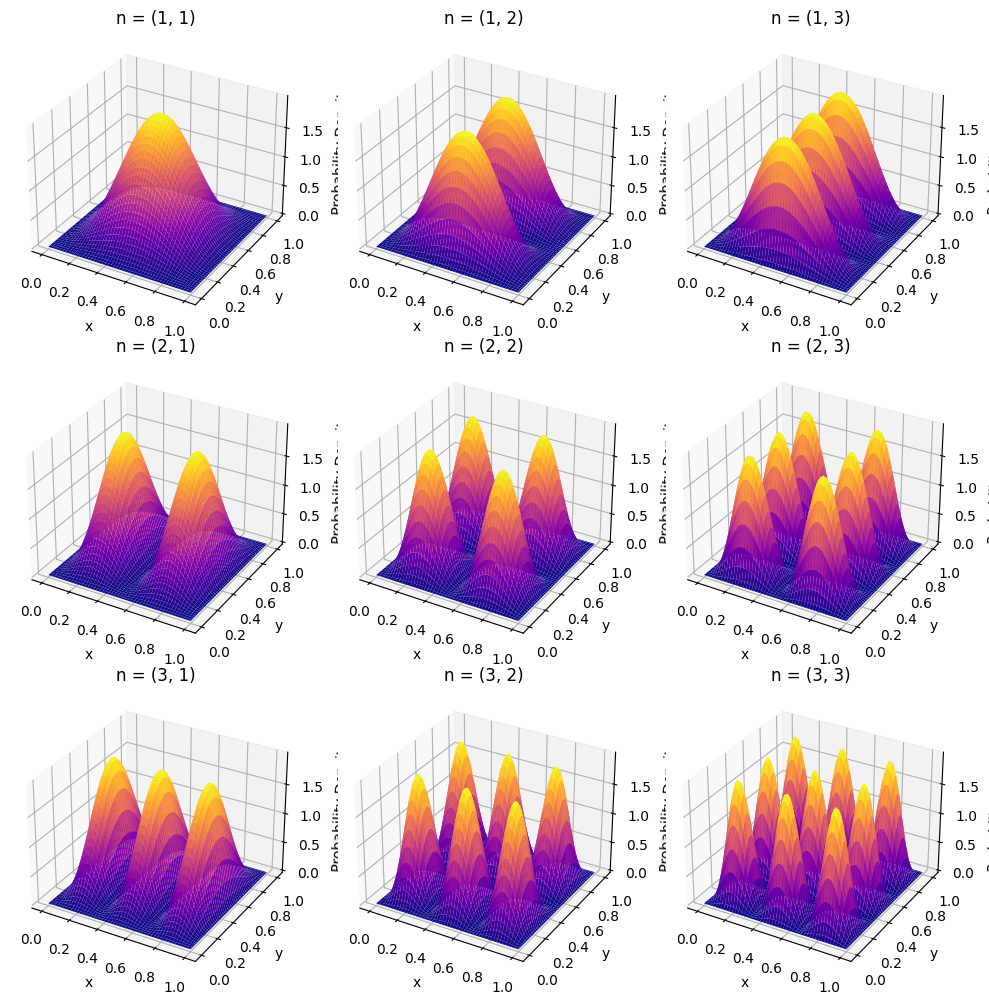

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
hbar = 1.0   # Planck's constant / 2pi
m = 1.0      # Particle mass
L = 1.0      # Length of the well
N = 100      # Number of points in x and y direction
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)

# Eigenstates
n_max = 3
eigenstates = np.zeros((n_max, n_max, N, N))
for n1 in range(1, n_max+1):
    for n2 in range(1, n_max+1):
        eigenstates[n1-1, n2-1] = np.sqrt(2/L) * np.sin(n1 * np.pi * X / L) * np.sin(n2 * np.pi * Y / L)

# Plotting the wavefunctions
fig = plt.figure(figsize=(10, 10))

for n1 in range(1, n_max+1):
    for n2 in range(1, n_max+1):
        ax = fig.add_subplot(n_max, n_max, (n1-1)*n_max + n2, projection='3d')
        prob_density = eigenstates[n1-1, n2-1]**2
        ax.plot_surface(X, Y, prob_density, cmap='plasma')
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('Probability Density')
        ax.set_title(f'n = ({n1}, {n2})')

plt.tight_layout()
plt.show()


In [20]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


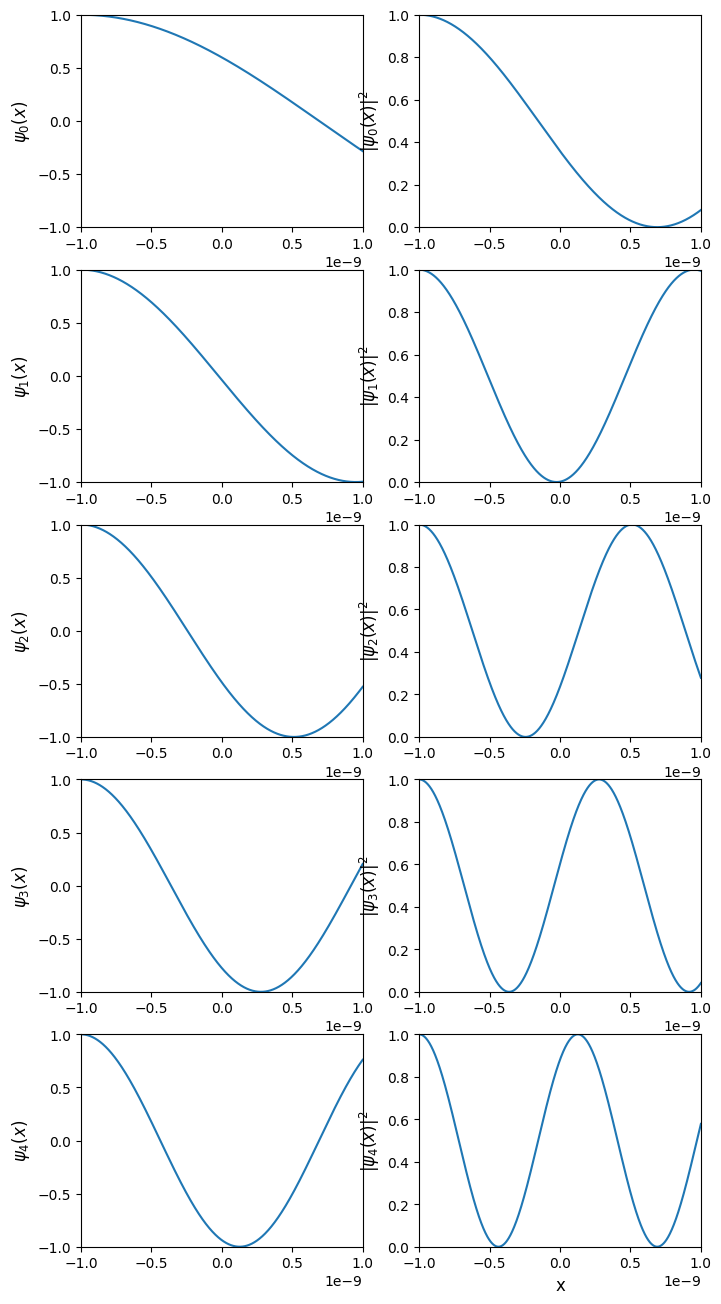

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
hbar = 1.0545718e-34  # Planck's constant over 2*pi [m^2 kg/s]
m = 9.10938356e-31   # Particle mass [kg]
w = 1e14             # Angular frequency [Hz]

# Define the potential energy function
def V(x):
    return 0.5*m*w**2*(x**4)

# Define the wave function differential equation
def schrodinger_eq(y, x):
    psi, psi_prime = y
    dpsi_dx = psi_prime
    dpsi_prime_dx = (2*m/hbar**2)*(V(x) - E)*psi
    return [dpsi_dx, dpsi_prime_dx]

# Define the range of x values
x_min = -1e-9
x_max = 1e-9
num_points = 1000
x = np.linspace(x_min, x_max, num_points)

# Define the energy levels to calculate the wave functions for
num_states = 5
E_levels = [hbar*w*(n+0.5) for n in range(num_states)]

# Calculate the wave functions and probability densities
wave_functions = []
prob_densities = []
for E in E_levels:
    # Solve the Schrodinger equation
    init_psi = [1, 0] # initial conditions: psi(x_min) = 1, psi'(x_min) = 0
    psi = odeint(schrodinger_eq, init_psi, x)
    wave_function = psi[:, 0]
    wave_functions.append(wave_function)

    # Calculate the probability density
    prob_density = np.abs(wave_function)**2
    prob_densities.append(prob_density)

# Plot the wave functions and probability densities
fig, axs = plt.subplots(num_states, 2, figsize=(8, 16))
for i in range(num_states):
    # Plot the wave function
    axs[i, 0].plot(x, wave_functions[i])
    axs[i, 0].set_ylabel(r"$\psi_{%i}(x)$" % i, fontsize=12)
    axs[i, 0].set_xlim(x_min, x_max)
    axs[i, 0].set_ylim(-1, 1)

    # Plot the probability density
    axs[i, 1].plot(x, prob_densities[i])
    axs[i, 1].set_ylabel(r"$|\psi_{%i}(x)|^2$" % i, fontsize=12)
    axs[i, 1].set_xlim(x_min, x_max)
    axs[i, 1].set_ylim(0, 1)

plt.xlabel("x", fontsize=12)
plt.show()


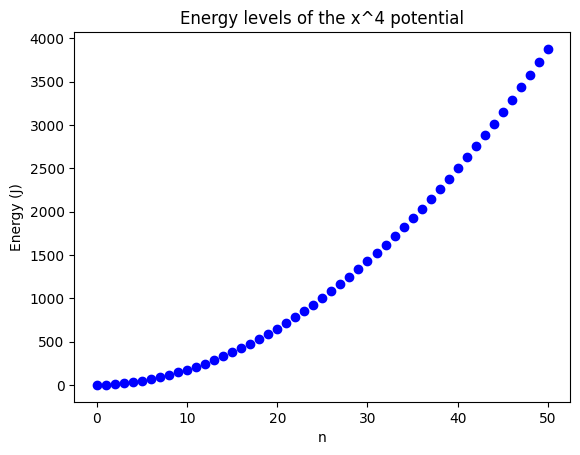

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
m = 1.0 # mass of the particle
w = 1.0 # angular frequency of the potential
hbar = 1.0 # reduced Planck's constant

# Define a function to calculate the energy
def energy(n):
    return (n + 0.5) * hbar * w + (3/2) * hbar * w * (n + 0.5)**2

# Create an array of n values from 0 to 10
n_values = np.arange(0, 51)

# Calculate the energy for each n value
energies = [energy(n) for n in n_values]

# Plot the energy vs n
plt.plot(n_values, energies, 'bo')
plt.xlabel('n')
plt.ylabel('Energy (J)')
plt.title('Energy levels of the x^4 potential')
plt.show()


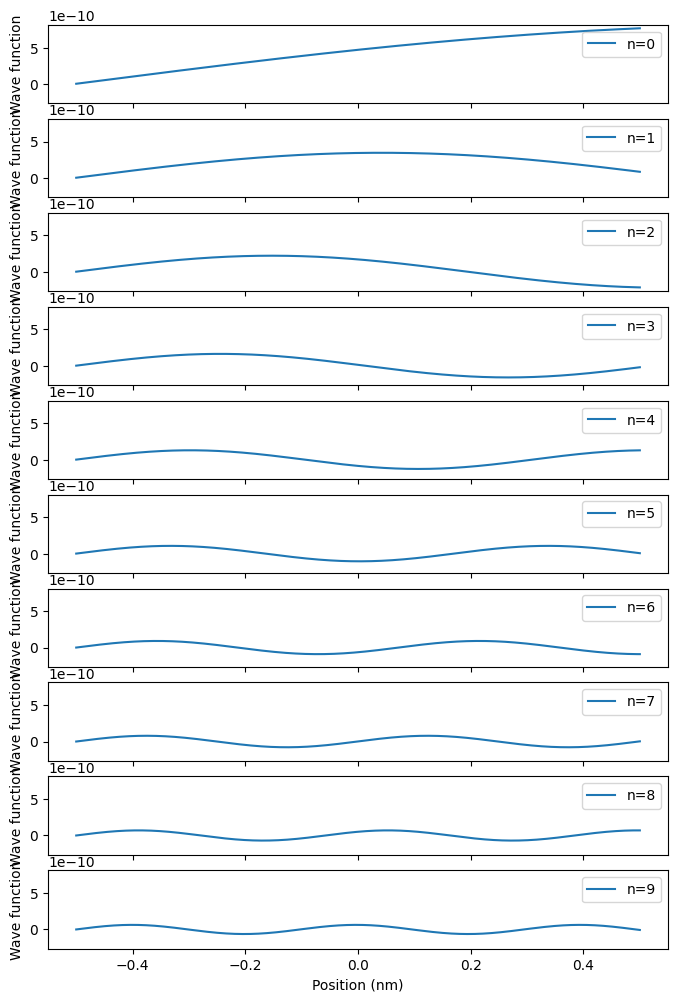

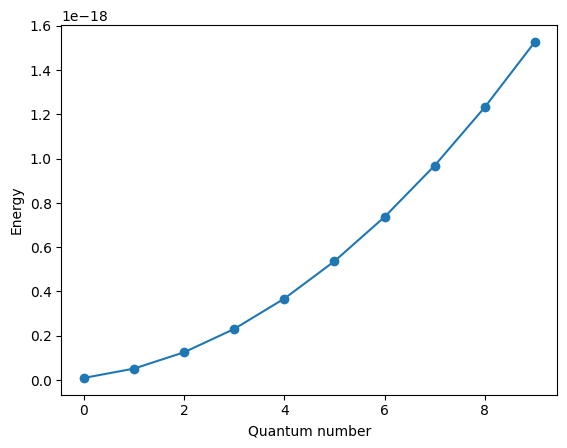

In [24]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define constants
hbar = 1.0545718e-34   # Planck's constant / 2pi
m = 9.10938356e-31     # Mass of electron
w = 1e14               # Oscillator frequency
L = 1e-9               # Box length
n_max = 9              # Maximum quantum number

# Define the potential energy function
def V(x):
    return 0.5 * m * w**2 * x**4

# Define the function to solve Schrodinger equation
def schrodinger_eq(y, x, E):
    psi, phi = y
    dydx = [phi, 2*m/(hbar**2) * (V(x) - E) * psi]
    return dydx

# Define the initial conditions and range of x values
x0 = -L/2
x1 = L/2
psi0 = 0
phi0 = 1
y0 = [psi0, phi0]
x = np.linspace(x0, x1, 1000)

# Solve the Schrodinger equation for each quantum number
Energies = []
Wavefunctions = []
for n in range(n_max + 1):
    # Calculate the energy for the given quantum number
    E = (n + 0.5) * hbar * w + (3/2) * hbar * w * (n + 0.5)**2
    Energies.append(E)
    
    # Solve the Schrodinger equation for the given energy and quantum number
    sol = odeint(schrodinger_eq, y0, x, args=(E,))
    psi = sol[:, 0]
    Wavefunctions.append(psi)
    
# Plot the wave functions for each quantum number
fig, axs = plt.subplots(nrows=n_max+1, sharex=True, sharey=True, figsize=(8,12))
for n, psi in enumerate(Wavefunctions):
    axs[n].plot(x*1e9, psi, label=f'n={n}')
    axs[n].set_ylabel('Wave function')
    axs[n].legend()
axs[-1].set_xlabel('Position (nm)')
plt.show()

# Plot the energy levels
fig, ax = plt.subplots()
ax.plot(range(n_max+1), Energies, 'o-')
ax.set_xlabel('Quantum number')
ax.set_ylabel('Energy')
plt.show()


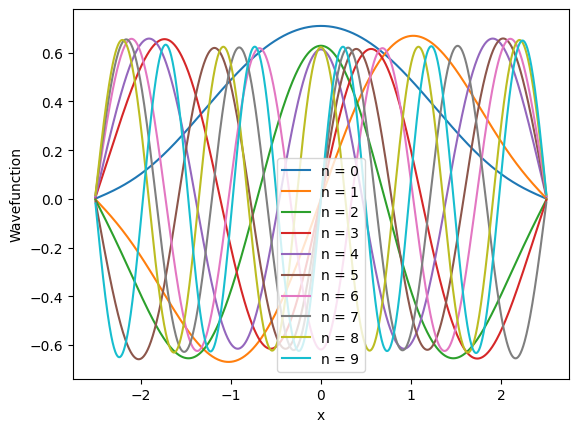

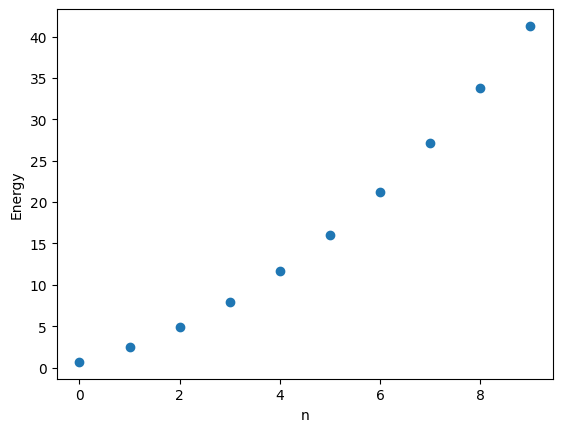

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the parameters
m = 1
w = 1
hbar = 1
L = 5
N = 1000
x = np.linspace(-L/2, L/2, N)
dx = x[1] - x[0]

# Define the potential
V = 0.25 * m * w**2 * x**4

# Define the Hamiltonian matrix
H = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            H[i, j] = 2.0 / (dx**2) + V[i]
        elif np.abs(i - j) == 1:
            H[i, j] = -1.0 / (dx**2)
                
# Diagonalize the Hamiltonian matrix to get the eigenvalues and eigenvectors
energies, wavefunctions = np.linalg.eigh(H)

# Normalize the wavefunctions
for i in range(N):
    norm = np.sqrt(np.sum(wavefunctions[:, i]**2 * dx))
    wavefunctions[:, i] /= norm

# Plot the wavefunctions
n_max = 9  # Maximum energy level to plot
for n in range(n_max + 1):
    plt.plot(x, wavefunctions[:, n], label=f'n = {n}')
plt.xlabel('x')
plt.ylabel('Wavefunction')
plt.legend()
plt.show()

# Plot the energy levels
energy_levels = energies[:n_max+1]
plt.plot(np.arange(n_max+1), energy_levels, 'o')
plt.xlabel('n')
plt.ylabel('Energy')
plt.show()


In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants and parameters
m = 1
w = 1
hbar = 1

# Define the potential function
def V(x):
    return 0.5 * m * w**2 * x**4

# Define the range of x
x = np.linspace(-5, 5, 1000)

# Solve the Schrödinger equation
n = 10
eigen_energies, eigen_functions = np.linalg.eigh(np.diag(np.sqrt(2 * m * (V(x) - eigen_energies[i])) / hbar) + np.diag((np.arange(1, n+1) - 0.5) * hbar * w, 1) + np.diag((np.arange(1, n+1) - 0.5) * hbar * w, -1)))

# Normalize the wave functions
norms = np.sqrt(np.trapz(eigen_functions**2, x=x, axis=1))
normalized_functions = eigen_functions / norms[:, np.newaxis]

# Plot each wave function separately
for i in range(n):
    plt.plot(x, normalized_functions[:, i], label=f"n={i}")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("Wave function")
plt.title("Wave functions for the pure quartic potential")
plt.legend()
plt.show()

# Print table of eigen energies
print("Eigen energies:")
for i in range(n):
    print(f"n={i}: {eigen_energies[i]}")


SyntaxError: ignored

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
m = 1
w = 1
hbar = 1

# Define potential function
def V(x):
    return 0.25 * m * w**2 * x**4

# Define Schrodinger equation
def SE(y, x, E):
    return np.array([y[1], (2 * m / hbar**2) * (V(x) - E) * y[0]])

# Define energy levels
n = 10
E_levels = np.zeros(n)

# Solve Schrodinger equation for each energy level
wavefunctions = []
x_array = np.linspace(-5, 5, 1000)
for i in range(n):
    E_levels[i], psi = np.linalg.eigh(-0.5 * np.gradient(np.gradient(np.vectorize(V)(x_array)), x_array) + np.diag([1, 0]*(len(x_array)-1)))
    psi = psi[:,i]
    psi /= np.sqrt(np.trapz(psi**2, x_array))
    wavefunctions.append(psi)

# Plot wavefunctions
fig, axs = plt.subplots(nrows=n, sharex=True, figsize=(6, 12))
for i in range(n):
    axs[i].plot(x_array, wavefunctions[i], label=f"n={i}")
    axs[i].set_ylabel("ψ(x)")
    axs[i].legend(loc="upper right")
plt.xlabel("x")
plt.show()

# Print energy levels
print("Energy levels:")
for i in range(n):
    print(f"n={i}, E={E_levels[i]}")


ValueError: ignored

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define the potential function
def V(x):
    return x**4

# Define the differential equation
def schrodinger_eq(psi, x, E):
    d2_psi = np.gradient(np.gradient(psi, x), x)
    return -d2_psi + (V(x) - E) * psi

# Define the range of x
x_min = -5
x_max = 5
x = np.linspace(x_min, x_max, 1000)

# Define the step size and initial values
dx = x[1] - x[0]
psi = np.zeros_like(x)
psi[0] = 1 / np.sqrt(dx)

# Define the number of energy levels to calculate
num_levels = 10

# Calculate the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eigh(np.diag(1 / dx**2 * np.ones_like(x[1:-1]), -1) +
                                   np.diag(-2 / dx**2 * np.ones_like(x)) +
                                   np.diag(1 / dx**2 * np.ones_like(x[1:-1]), 1) +
                                   np.diag(V(x) - eigvals) )

# Sort the eigenvalues and eigenvectors
sort_indices = np.argsort(eigvals)
eigvals = eigvals[sort_indices][:num_levels]
eigvecs = eigvecs[:, sort_indices][:, :num_levels]

# Plot each wave function
for i in range(num_levels):
    plt.plot(x, eigvecs[:, i], label=f"n={i}")

# Plot the potential energy function
plt.plot(x, V(x), 'k--', label='V(x)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('Wave function')
plt.title('Wave functions for the quartic potential')
plt.legend()

# Print the eigenvalues in a table
print('Eigenvalues:')
print('------------')
for i in range(num_levels):
    print(f"n={i}: {eigvals[i]:.4f}")

plt.show()


ValueError: ignored

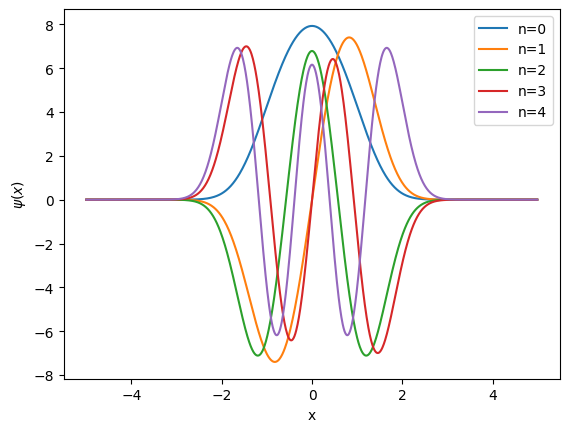

Eigenvalues:
n=0: 0.5302
n=1: 1.8998
n=2: 3.7277
n=3: 5.8220
n=4: 8.1303
n=5: 10.6181
n=6: 13.2625
n=7: 16.0468
n=8: 18.9581
n=9: 21.9859


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# define constants and variables
hbar = 1.0
m = 1.0
w = 1.0
N = 1000
L = 10.0
x = np.linspace(-L/2, L/2, N+1)[:-1] # change shape of x array
dx = x[1] - x[0]
V = 0.5 * m * w**2 * x**4

# construct kinetic energy matrix
T = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i == j:
            T[i, j] = -2.0
        elif np.abs(i-j) == 1:
            T[i, j] = 1.0
T *= -0.5*hbar**2/(m*dx**2)

# solve for eigenvalues and eigenvectors
E, psi = np.linalg.eigh(T + np.diag(V))

# normalize wave functions
for i in range(N):
    psi[:, i] /= np.sqrt(dx*np.trapz(psi[:, i]**2, x))

# plot wave functions
for i in range(5):
    plt.plot(x, psi[:, i], label=f"n={i}")

plt.xlabel("x")
plt.ylabel("$\psi(x)$")
plt.legend()
plt.show()

# print table of eigenvalues
print("Eigenvalues:")
for i in range(10):
    print(f"n={i}: {E[i]:.4f}")
